Gold Price Prediction... 

RandomForest- ML model

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [79]:
gold_data = pd.read_csv('/Machine_Learning/Dataset/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [80]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [81]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [82]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [83]:
gold_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Positive Coorelation or 
Negative Coorelation

In [84]:
correlation = gold_data.corr()

<AxesSubplot:>

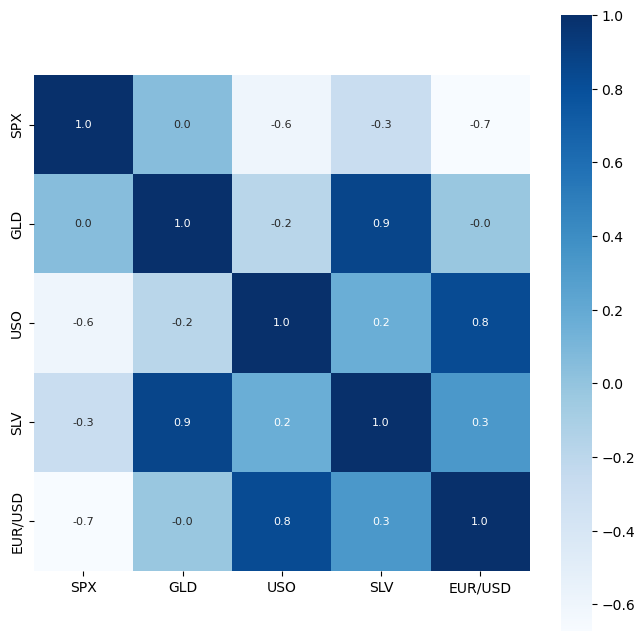

In [85]:
#constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt='.1f',annot_kws={'size':8}, cmap='Blues')

In [86]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


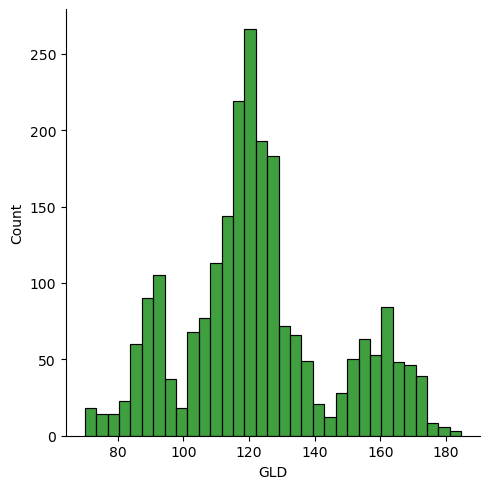

In [87]:
#CHECKING THE DISTRIBUTION OF THE GLD PRICE

sns.displot(gold_data['GLD'],color='green')

In [88]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [89]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [90]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and testing data

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

Model Training- Random Forest Regressor

In [92]:
regressor = RandomForestRegressor(n_estimators=200)

In [93]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [94]:
regressor.score(X_test,Y_test)

0.9898033425796232

In [95]:
regressor.predict([[ 1447.160034 ,78.470001, 15.1800, 1.471692]])

c:\Users\MOHIT RANJAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.10940021])

In [96]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[109.14470038 116.8051511  150.28305094 127.72940144 123.13634846
 125.2878025  119.92924959  74.29945087 106.47840099  93.97904988
 117.52910039 169.51989988 102.96100038  94.50605031 162.37620353
  88.40400022 125.83509937 150.54660203  92.86080056 155.87310012
 128.58045135  91.02379856 108.14605062 124.98189904 160.19149609
  76.43140087 124.75964986 143.47414956 116.49029819 126.96885006
 141.195748    95.41484929 102.10150044 136.0136986  114.39924935
  91.44434897 115.29645162 167.65539927  89.33924997 167.02175067
 128.07790031 122.21610003 148.0853973   87.33444966 117.37700022
 134.92610058 154.58825155  84.23029984 114.2215998  106.09925079
 123.14780065 137.51235036 120.49224942 124.8784996  116.43619863
 126.7063493   93.80580168 118.87524976  97.78014943  91.10415114
 167.36634909 125.85880013 121.35390057 121.60710064 108.62569944
 117.78909998 168.1385489  120.3789006  108.10299887 129.16119678
 128.17514842 125.82179942 161.88115276 126.00659951  89.63014981
 173.12729

In [97]:
#R squared error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9898033425796232


compare the actual values and predictred values in graph



In [99]:
Y_test = list(Y_test)

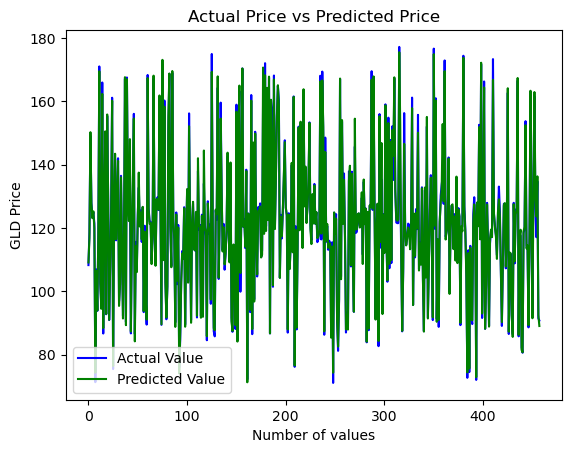

In [102]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()